In [23]:
from scipy.io import loadmat
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Loading datasets
mat = loadmat("cancerWTrain.mat")
cancerTrainX = mat["cancerTrainX"]
cancerTrainY = mat["cancerTrainY"]
print(cancerTrainX.shape)
print(cancerTrainX[:5,:5])
print(cancerTrainY.shape)
print(cancerTrainY[:5,:5])

#we have to take transpose for change the shape of cancerTrainX
cancerTrainX=cancerTrainX.transpose()
cancerTrainY=cancerTrainY.transpose()

(30, 400)
[[1.453e+01 1.136e+01 1.768e+01 1.902e+01 2.048e+01]
 [1.398e+01 1.757e+01 2.074e+01 2.459e+01 2.146e+01]
 [9.386e+01 7.249e+01 1.174e+02 1.220e+02 1.325e+02]
 [6.442e+02 3.998e+02 9.637e+02 1.076e+03 1.306e+03]
 [1.099e-01 8.858e-02 1.115e-01 9.029e-02 8.355e-02]]
(1, 400)
[[0 0 1 1 1]]


In [24]:
cancerTrainY=cancerTrainY.reshape(len(cancerTrainX))

#Data preprocessing i.e 
scaler = StandardScaler()
scaler.fit(cancerTrainX)
scaled_cancer_trainx=scaler.transform(cancerTrainX)
print(scaled_cancer_trainx.shape)
print(scaled_cancer_trainx[:5,:5])
print(cancerTrainY.shape)
print(cancerTrainY[:5])




(400, 30)
[[ 0.11460184 -1.24395724  0.07895931 -0.03005724  0.96753454]
 [-0.80287855 -0.39483967 -0.81669104 -0.72915924 -0.52140722]
 [ 1.02629371  0.35493824  1.06555778  0.88386702  1.07927501]
 [ 1.41412453  1.26555179  1.25835102  1.20509924 -0.40198459]
 [ 1.83668648  0.5252348   1.69842255  1.86301029 -0.87269132]]
(400,)
[0 0 1 1 1]


In [25]:
#Now apply PCA for Visulization
pca = PCA(n_components=2)
cancerTrainX_pca=pca.fit_transform(scaled_cancer_trainx)

cancerTrainY=cancerTrainY.reshape(len(cancerTrainX_pca))
#Showing subset 
print(cancerTrainX_pca[:2])
print(cancerTrainY[:2])

[[-1.07976537 -0.42205276]
 [-2.85194933 -0.37931792]]
[0 0]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


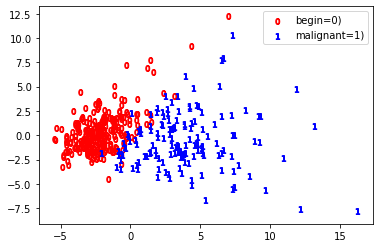

In [22]:
fig,ax=plt.subplots()
X0 = cancerTrainX_pca[cancerTrainY==0]
X1 = cancerTrainX_pca[cancerTrainY==1]
ax.scatter(X0[:,0], X0[:,1], color="red", marker="$0$", label="begin=0)")
ax.scatter(X1[:,0], X1[:,1], color="blue", marker="$1$", label="malignant=1)")
ax.legend()
fig.show() 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

######  PCA, Split Data, ,Prediction Manually  #######

pca = PCA(n_components=15)
cancerTrainXpca2=pca.fit_transform(scaled_cancer_trainx)
print(cancerTrainXpca2[:2])
#cancerTrainY=cancerTrainY.reshape(len(cancerTrainX))
TrainX, TestX, TrainY,TestY = train_test_split(cancerTrainXpca2, cancerTrainY, test_size=0.40)

[[-1.07976537 -0.42205276 -0.53030854  2.14491203 -0.18668117 -0.53646022
  -0.41842725 -0.43491418 -0.48973624 -0.13620123  0.26913842 -0.855192
  -0.28745922  0.01953258  0.445493  ]
 [-2.85194933 -0.37931792 -0.96447876 -1.67848222 -0.53266037 -0.44011678
   0.04002356 -0.29517087  0.68967407 -0.52028224  0.37893741  0.65301396
  -0.56758839  0.16248136 -0.02175003]]


In [30]:
'''################### Bu Using KNN ##########################'''
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(TrainX,TrainY)
#Prediction 
y_pred = classifier.predict(TestX)
y_pred_train=classifier.predict(TrainX)
print(y_pred)
print(len(y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(TestY, y_pred))
print(classification_report(TestY, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(TestY,y_pred)
print(acc)

[0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0]
160
[[105   0]
 [  8  47]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       105
           1       1.00      0.85      0.92        55

    accuracy                           0.95       160
   macro avg       0.96      0.93      0.94       160
weighted avg       0.95      0.95      0.95       160

0.95


In [31]:
#Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, TrainX, TrainY, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[0.9375     0.91666667 0.95833333 0.95833333 0.95833333]
0.9458333333333334


In [35]:
#Hyper Parameter Tunning i.e K best value

from sklearn.model_selection import GridSearchCV
k_range = list(range(1,30))
param_grid = dict(n_neighbors = k_range)

#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid.fit(TrainX,TrainY)
print ("Best Accuracy ",grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
param=grid.best_params_
#Best Parameters
best_params=param.get('n_neighbors')
print("optimal k= ",best_params)

Best Accuracy  0.9458333333333333
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
optimal k=  5


In [36]:
#Train model according to best parameter
classifier = KNeighborsClassifier(n_neighbors=best_params)
classifier.fit(TrainX,TrainY)
print(TestX.shape)

y_pred = classifier.predict(TestX)
#y_pred_train=classifier.predict(TrainX)
print(y_pred)
print(len(y_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(TestY, y_pred))
print(classification_report(TestY, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(TestY,y_pred)
print(acc) 

(160, 15)
[0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0]
160
[[103   2]
 [  6  49]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       105
           1       0.96      0.89      0.92        55

    accuracy                           0.95       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.95      0.95       160

0.95


In [38]:
#Working on Test Data
cancerTestX = mat["cancerTestX"]
cancerTestX = cancerTestX.transpose()
#Data preprocessing i.e 
scalerTest = StandardScaler()
scalerTest.fit(cancerTestX)
scaled_cancer_testx=scaler.transform(cancerTestX)

#print(scaled[:3,:2])

#Now apply PCA for Visulization
pca = PCA(n_components=15)
cancerTestX_pca2=pca.fit_transform(scaled_cancer_testx)

#cancerTrainY=cancerTrainY.reshape(len(cancerTestX_pca))
#Showing subset 
print(cancerTestX_pca2[:2])
print(cancerTestX_pca2.shape)
#print(.shape)



[[-2.36068181e+00 -1.46438278e+00 -3.97105627e-01 -1.43132079e+00
  -2.99911277e-01 -1.67201342e-01 -6.88878212e-01  1.21166357e-01
   3.00472832e-01 -1.55395867e-01 -1.36196205e-01 -1.63594925e-01
   1.29768868e-01 -3.68443701e-02  2.44401218e-01]
 [-1.86606906e+00  3.40544799e+00  1.69756599e+00 -7.73369604e-02
   6.26608288e-01 -4.40811853e-01  1.18646606e-01  8.95102496e-01
  -5.98644491e-01 -4.93351375e-01  7.27303935e-01  3.82914913e-01
  -2.39278460e-03 -1.81937323e-01 -2.42811737e-01]]
(169, 15)


In [39]:
y_pred_testx = classifier.predict(cancerTestX_pca2)
print(y_pred_testx)
print(len(y_pred_testx))

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0]
169


In [42]:
''' Now Implementing ANN '''
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#TrainX, TestX, TrainY,TestY = train_test_split(cancerTrainXpca2, cancerTrainY, test_size=0.40)
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(TrainX,TrainY)





predict_train = mlp.predict(TrainX)
predict_test = mlp.predict(TestX)
print(predict_test[:10])
print(len(predict_test))
#print()

#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(TestY,predict_test)
print(acc)

[1 1 0 0 1 0 0 0 0 1]
160
0.96875


In [44]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(TrainX,TrainY)

print('Best parameters found:\n', clf.best_params_)
y_pred = clf.predict(TestX)
print(y_pred[:10])
from sklearn.metrics import accuracy_score
acc = accuracy_score(TestY,y_pred)
print(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
[1 1 0 0 1 0 0 0 0 0]
0.98125


In [45]:
# Now prediction with Test Data
y_pred_testx = clf.predict(cancerTestX_pca2)
print(y_pred_testx)
print(len(y_pred_testx))

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0]
169


In [59]:
## Decsion Tree
from sklearn import tree
#clf_d = tree.DecisionTreeClassifier()
def decsionTree(max_depth,min_sample_leaf):
    
    clf_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=max_depth, min_samples_leaf=min_sample_leaf)
    clf_gini.fit(TrainX,TrainY)
    y_predd = clf_gini.predict(TestX)
    print(y_predd[:10])
    acc = accuracy_score(TestY,y_predd)
    print("accuracy when max and min value:",max_depth,min_sample_leaf)
    print(acc)
    return acc,max_depth,min_sample_leaf
acc_list_DT=[]
acc_list_DT.append(decsionTree(3,5))
acc_list_DT.append(decsionTree(10,4))
acc_list_DT.append(decsionTree(10,5))
acc_list_DT.append(decsionTree(2,2))
acc_list_DT.append(decsionTree(12,1))
acc_list_DT.sort()
temp=acc_list_DT[-1]
print("Best accuracy with parameters ",temp[0],temp[1],temp[2])
maxdep=temp[1]
leaf_sample=temp[2]
#print("\nbest accuracy with model",temp[],temp[0])
b_model_DT=tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=maxdep, min_samples_leaf=leaf_sample)
b_model_DT.fit(TrainX,TrainY)

[1 1 0 0 1 0 0 0 0 1]
accuracy when max and min value: 3 5
0.90625
[1 1 0 0 1 0 0 0 0 0]
accuracy when max and min value: 10 4
0.925
[1 1 0 0 1 0 0 0 0 0]
accuracy when max and min value: 10 5
0.925
[1 1 0 0 1 0 0 0 0 1]
accuracy when max and min value: 2 2
0.90625
[1 1 0 0 1 0 0 0 0 0]
accuracy when max and min value: 12 1
0.9125
Best accuracy with parameters  0.925 10 5


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [100]:
clf= tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=10, min_samples_leaf=4)
clf.fit(TrainX,TrainY)
y_predd = clf.predict(TestX)
print(y_predd[:10])
acc = accuracy_score(TestY,y_predd)
print(acc)

[0 0 0 1 0 1 0 1 0 0]
0.9375


In [101]:
y_pred_testx_d = clf.predict(cancerTestX_pca2)
print(y_pred_testx)
print(len(y_pred_testx))

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0]
169
